## Importing Libraries

In [25]:
import os
import librosa
from pathlib import Path
import warnings
import soundfile as sf
warnings.filterwarnings('ignore')

## Reading all the audio files from the folder

In [17]:
def read_audio_files(folder_path):
    audio_files = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path) and any(filename.endswith(ext) for ext in ['.wav', '.mp3', '.flac']):  
            # Check if the file is a valid audio file (wav, mp3, or flac)
            try:
                audio, sr = librosa.load(file_path, sr=None)  # Load audio file
                audio_files.append((audio, sr, filename))  # Store audio, sampling rate, and filename
            except Exception as e:
                print(f"Error loading {filename}: {str(e)}")
    return audio_files

folder_path = "D:/Project Echo data/part4/bird files part 4"
audio_files = read_audio_files(folder_path)
for audio, sr, filename in audio_files:
    print(f"File: {filename}, Sampling Rate: {sr}, Length: {len(audio)} samples")

File: 203967261.mp3, Sampling Rate: 44100, Length: 1795968 samples
File: 203967271.mp3, Sampling Rate: 44100, Length: 827136 samples
File: 203967281.mp3, Sampling Rate: 44100, Length: 1663488 samples
File: 203967291.mp3, Sampling Rate: 44100, Length: 951552 samples
File: 203967301.mp3, Sampling Rate: 44100, Length: 763776 samples
File: 203967311.mp3, Sampling Rate: 44100, Length: 643968 samples
File: 203967321.mp3, Sampling Rate: 44100, Length: 778752 samples
File: 203967331.mp3, Sampling Rate: 44100, Length: 262656 samples
File: 203967341.mp3, Sampling Rate: 44100, Length: 1407744 samples
File: 203967351.mp3, Sampling Rate: 44100, Length: 1716480 samples
File: 203967361.mp3, Sampling Rate: 44100, Length: 916992 samples
File: 203967371.mp3, Sampling Rate: 44100, Length: 587520 samples
File: 203967381.mp3, Sampling Rate: 44100, Length: 426240 samples
File: 203967391.mp3, Sampling Rate: 44100, Length: 487296 samples
File: 203967401.mp3, Sampling Rate: 44100, Length: 289152 samples
File: 

### Counting number of files

In [20]:
def count_audio_files(folder_path):
    audio_extensions = ['.mp3', '.flac', '.wav']
    num_files = len([filename for filename in os.listdir(folder_path) 
                     if os.path.isfile(os.path.join(folder_path, filename)) 
                     and any(filename.endswith(ext) for ext in audio_extensions)])
    return num_files

folder_path = "D:/Project Echo data/part4/bird files part 4"
num_audio_files = count_audio_files(folder_path)
print(f"Number of audio files in the folder: {num_audio_files}")


Number of audio files in the folder: 850


## Coverting all the audio files to .wav format.

In [21]:
def convert_audio_to_wav(input_folder, output_folder, target_sr=16000):
    # Create output folder if it doesn't exist
    Path(output_folder).mkdir(parents=True, exist_ok=True)
    
    audio_extensions = ['.mp3', '.flac', '.wav']
    
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        
        # Check if the file has one of the specified audio extensions
        if not any(filename.endswith(ext) for ext in audio_extensions):
            continue
        
        output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + '.wav')
        
        # Load audio file
        try:
            audio, sr = librosa.load(input_path, sr=None)
        except Exception as e:
            print(f"Error loading {filename}: {str(e)}")
            continue
        
        
        if sr != target_sr:
            audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
            sr = target_sr
        
        # Save as WAV file
        try:
            sf.write(output_path, audio, samplerate=sr)
            print(f"Converted {filename} to {output_path}")
        except Exception as e:
            print(f"Error saving {output_path}: {str(e)}")


input_folder = "D:/Project Echo data/part4/bird files part 4"
output_folder = "D:/Project Echo data/part4/wav_files"
convert_audio_to_wav(input_folder, output_folder)


Converted 203967261.mp3 to D:/Project Echo data/part4/wav_files\203967261.wav
Converted 203967271.mp3 to D:/Project Echo data/part4/wav_files\203967271.wav
Converted 203967281.mp3 to D:/Project Echo data/part4/wav_files\203967281.wav
Converted 203967291.mp3 to D:/Project Echo data/part4/wav_files\203967291.wav
Converted 203967301.mp3 to D:/Project Echo data/part4/wav_files\203967301.wav
Converted 203967311.mp3 to D:/Project Echo data/part4/wav_files\203967311.wav
Converted 203967321.mp3 to D:/Project Echo data/part4/wav_files\203967321.wav
Converted 203967331.mp3 to D:/Project Echo data/part4/wav_files\203967331.wav
Converted 203967341.mp3 to D:/Project Echo data/part4/wav_files\203967341.wav
Converted 203967351.mp3 to D:/Project Echo data/part4/wav_files\203967351.wav
Converted 203967361.mp3 to D:/Project Echo data/part4/wav_files\203967361.wav
Converted 203967371.mp3 to D:/Project Echo data/part4/wav_files\203967371.wav
Converted 203967381.mp3 to D:/Project Echo data/part4/wav_files\

In [22]:
folder_path = "D:/Project Echo data/part4/wav_files"
num_audio_files = count_audio_files(folder_path)
print(f"Number of audio files in the folder: {num_audio_files}")

Number of audio files in the folder: 850


In [24]:
def check_wav_files(output_folder):
    for filename in os.listdir(output_folder):
        if filename.endswith('.wav'):
            file_path = os.path.join(output_folder, filename)
            try:
                audio, sr = librosa.load(file_path, sr=None)
                print(f"File: {filename}, Sampling Rate: {sr}, Length: {len(audio)} samples")
            except Exception as e:
                print(f"Error loading {filename}: {str(e)}")


output_folder = "D:/Project Echo data/part4/wav_files"
check_wav_files(output_folder)


File: 203967261.wav, Sampling Rate: 16000, Length: 651599 samples
File: 203967271.wav, Sampling Rate: 16000, Length: 300095 samples
File: 203967281.wav, Sampling Rate: 16000, Length: 603534 samples
File: 203967291.wav, Sampling Rate: 16000, Length: 345235 samples
File: 203967301.wav, Sampling Rate: 16000, Length: 277107 samples
File: 203967311.wav, Sampling Rate: 16000, Length: 233640 samples
File: 203967321.wav, Sampling Rate: 16000, Length: 282541 samples
File: 203967331.wav, Sampling Rate: 16000, Length: 95295 samples
File: 203967341.wav, Sampling Rate: 16000, Length: 510747 samples
File: 203967351.wav, Sampling Rate: 16000, Length: 622760 samples
File: 203967361.wav, Sampling Rate: 16000, Length: 332696 samples
File: 203967371.wav, Sampling Rate: 16000, Length: 213160 samples
File: 203967381.wav, Sampling Rate: 16000, Length: 154645 samples
File: 203967391.wav, Sampling Rate: 16000, Length: 176797 samples
File: 203967401.wav, Sampling Rate: 16000, Length: 104908 samples
File: 20396

## Exploratory Data Analysis (EDA)

MFCC shape: (13, 587)


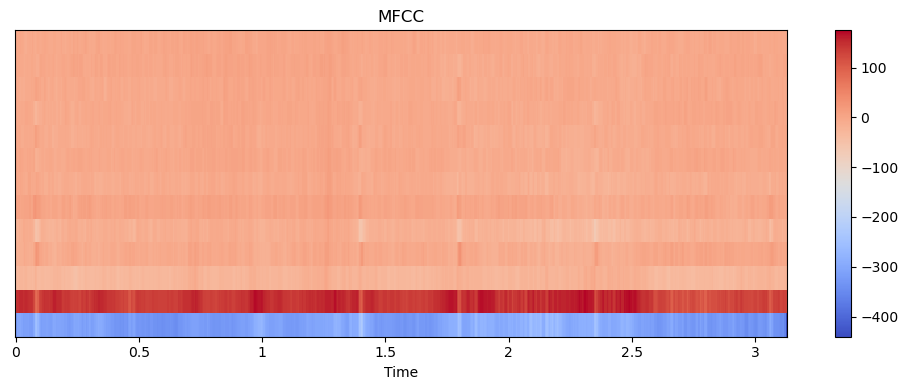

In [72]:
import librosa.display
import matplotlib.pyplot as plt

import numpy as np

def extract_mfcc(audio_path, sr=16000, n_mfcc=13):
    try:
        # Load audio file
        audio, _ = librosa.load(audio_path, sr=sr)
        
        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        
        return mfccs
    except Exception as e:
        print(f"Error extracting MFCC from {audio_path}: {str(e)}")
        return None


audio_path = "D:/Project Echo data/part4/wav_files/203967271.wav"
mfccs = extract_mfcc(audio_path)
if mfccs is not None:
    print("MFCC shape:", mfccs.shape)
    # Visualize MFCC
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()


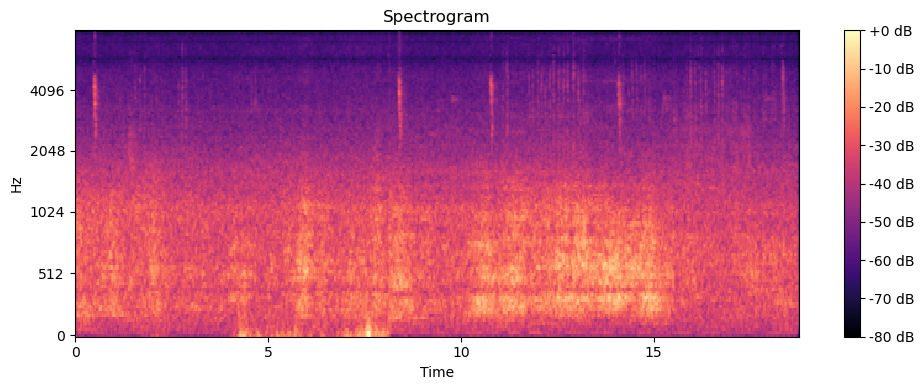

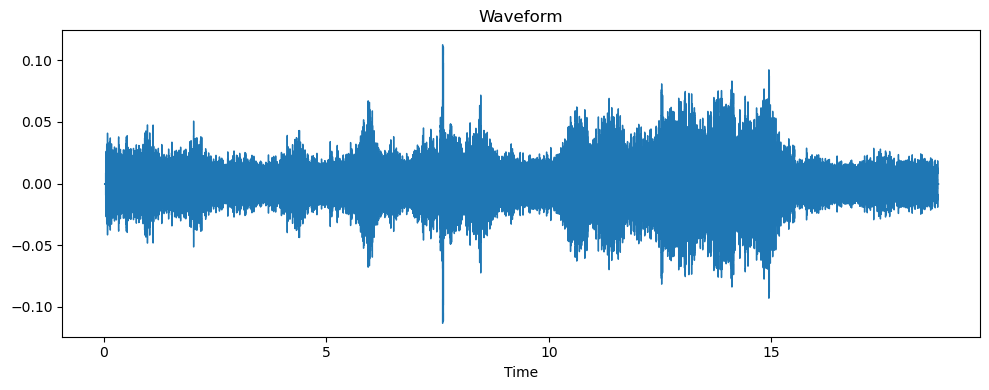

In [73]:
def plot_spectrogram(audio_path, sr=16000):
    try:
        # Load audio file
        audio, _ = librosa.load(audio_path, sr=sr)
        
        # Compute spectrogram
        spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
        
        # Convert to decibel scale
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
        
        # Plot spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting spectrogram for {audio_path}: {str(e)}")

def plot_waveform(audio_path, sr=16000):
    try:
        # Load audio file
        audio, _ = librosa.load(audio_path, sr=sr)
        
        # Plot waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(audio, sr=sr)
        plt.title('Waveform')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error plotting waveform for {audio_path}: {str(e)}")


audio_path = "D:/Project Echo data/part4/wav_files/203967271.wav"
plot_spectrogram(audio_path)
plot_waveform(audio_path)


In [77]:
def compute_energy_envelope(audio_path, frame_length=2048, hop_length=512):
    try:
        # Load audio file
        audio, _ = librosa.load(audio_path, sr=None)

        # Calculate RMS energy
        energy_envelope = librosa.feature.rms(y=audio, frame_length=frame_length, hop_length=hop_length)[0]

        return energy_envelope
    except Exception as e:
        print(f"Error computing energy envelope for {audio_path}: {str(e)}")
        return None

# Directory containing audio files
folder_path = "D:/Project Echo data/part4/wav_files"

# List to store energy envelopes
energy_envelopes = []

# Iterate through audio files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        audio_path = os.path.join(folder_path, filename)
        energy_envelope = compute_energy_envelope(audio_path)
        if energy_envelope is not None:
            energy_envelopes.append((filename, energy_envelope))

# Display energy envelopes
for filename, energy_envelope in energy_envelopes:
    print(f"Energy envelope for {filename}: Mean={np.mean(energy_envelope)}, Std={np.std(energy_envelope)}")


Energy envelope for 203967261.wav: Mean=0.019153300672769547, Std=0.003330721752718091
Energy envelope for 203967271.wav: Mean=0.011565796099603176, Std=0.00552497711032629
Energy envelope for 203967281.wav: Mean=0.01476355455815792, Std=0.018706319853663445
Energy envelope for 203967291.wav: Mean=0.004378761164844036, Std=0.0013197744265198708
Energy envelope for 203967301.wav: Mean=0.019380657002329826, Std=0.019111139699816704
Energy envelope for 203967311.wav: Mean=0.020539211109280586, Std=0.022819047793745995
Energy envelope for 203967321.wav: Mean=0.009982063435018063, Std=0.011643556877970695
Energy envelope for 203967331.wav: Mean=0.011509628035128117, Std=0.0068017118610441685
Energy envelope for 203967341.wav: Mean=0.0025907037779688835, Std=0.000400150049244985
Energy envelope for 203967351.wav: Mean=0.002289463998749852, Std=0.0013973419554531574
Energy envelope for 203967361.wav: Mean=0.002535624895244837, Std=0.0010644892463460565
Energy envelope for 203967371.wav: Mean=

In [78]:
def compute_chroma_features(audio_path, sr=16000):
    try:
        # Load audio file
        audio, _ = librosa.load(audio_path, sr=sr)

        # Compute chroma features
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)

        return chroma
    except Exception as e:
        print(f"Error computing chroma features for {audio_path}: {str(e)}")
        return None

# Directory containing audio files
folder_path = "D:/Project Echo data/part4/wav_files"

# List to store chroma features
chroma_features_list = []

# Iterate through audio files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        audio_path = os.path.join(folder_path, filename)
        chroma_features = compute_chroma_features(audio_path)
        if chroma_features is not None:
            chroma_features_list.append((filename, chroma_features))

# Display chroma features
for filename, chroma_features in chroma_features_list:
    print(f"Chroma features for {filename}: Shape={chroma_features.shape}")


Chroma features for 203967261.wav: Shape=(12, 1273)
Chroma features for 203967271.wav: Shape=(12, 587)
Chroma features for 203967281.wav: Shape=(12, 1179)
Chroma features for 203967291.wav: Shape=(12, 675)
Chroma features for 203967301.wav: Shape=(12, 542)
Chroma features for 203967311.wav: Shape=(12, 457)
Chroma features for 203967321.wav: Shape=(12, 552)
Chroma features for 203967331.wav: Shape=(12, 187)
Chroma features for 203967341.wav: Shape=(12, 998)
Chroma features for 203967351.wav: Shape=(12, 1217)
Chroma features for 203967361.wav: Shape=(12, 650)
Chroma features for 203967371.wav: Shape=(12, 417)
Chroma features for 203967381.wav: Shape=(12, 303)
Chroma features for 203967391.wav: Shape=(12, 346)
Chroma features for 203967401.wav: Shape=(12, 205)
Chroma features for 203967411.wav: Shape=(12, 889)
Chroma features for 203967421.wav: Shape=(12, 686)
Chroma features for 203967431.wav: Shape=(12, 116)
Chroma features for 203967441.wav: Shape=(12, 756)
Chroma features for 20396745

In [79]:
def compute_spectral_bandwidth(audio_path, sr=16000):
    try:
        # Load audio file
        audio, _ = librosa.load(audio_path, sr=sr)

        # Compute spectral bandwidth
        bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)

        return bandwidth
    except Exception as e:
        print(f"Error computing spectral bandwidth for {audio_path}: {str(e)}")
        return None

# Directory containing audio files
folder_path = "D:/Project Echo data/part4/wav_files"

# List to store spectral bandwidth
spectral_bandwidth_list = []

# Iterate through audio files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        audio_path = os.path.join(folder_path, filename)
        bandwidth = compute_spectral_bandwidth(audio_path)
        if bandwidth is not None:
            spectral_bandwidth_list.append((filename, bandwidth))

# Display spectral bandwidth
for filename, bandwidth in spectral_bandwidth_list:
    print(f"Spectral bandwidth for {filename}: Mean={bandwidth.mean()}, Std={bandwidth.std()}")


Spectral bandwidth for 203967261.wav: Mean=1260.1592031172959, Std=171.68560674417213
Spectral bandwidth for 203967271.wav: Mean=1301.5721569812274, Std=134.59460358103135
Spectral bandwidth for 203967281.wav: Mean=1389.5254057220413, Std=138.23059778191325
Spectral bandwidth for 203967291.wav: Mean=1659.627429652827, Std=139.4129908726335
Spectral bandwidth for 203967301.wav: Mean=1470.2564789796388, Std=182.56071303189438
Spectral bandwidth for 203967311.wav: Mean=1484.2089637717127, Std=162.9247179832537
Spectral bandwidth for 203967321.wav: Mean=1599.7167817814093, Std=536.8291427132486
Spectral bandwidth for 203967331.wav: Mean=1774.9705438949984, Std=306.12739453817136
Spectral bandwidth for 203967341.wav: Mean=1880.8661940996442, Std=94.5106715969589
Spectral bandwidth for 203967351.wav: Mean=1897.344370786852, Std=109.73732889654646
Spectral bandwidth for 203967361.wav: Mean=1830.7341671971708, Std=172.4139739919147
Spectral bandwidth for 203967371.wav: Mean=2032.034078715134, 

## Making a dataframe for data manipulation

In [26]:
import os
import librosa
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pathlib import Path

def load_wav_files_into_dataframe(folder_path):
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(folder_path, filename)
            try:
                audio, sr = librosa.load(file_path, sr=None)
                duration = librosa.get_duration(y=audio, sr=sr)
                data.append({'filename': filename, 'sampling_rate': sr, 'duration': duration})
            except Exception as e:
                print(f"Error loading {filename}: {str(e)}")
    
    df = pd.DataFrame(data)
    return df

# Load ".wav" files into a DataFrame
output_folder = "D:/Project Echo data/part4/wav_files"
df = load_wav_files_into_dataframe(output_folder)



In [27]:
df

,filename,sampling_rate,duration
0,203967261.wav,16000,40.724938
1,203967271.wav,16000,18.755938
2,203967281.wav,16000,37.720875
3,203967291.wav,16000,21.577188
4,203967301.wav,16000,17.319188
...,...,...,...
845,214375401.wav,16000,24.920875
846,214381141.wav,16000,53.490000
847,214381771.wav,16000,100.471688
848,214382381.wav,16000,54.759000


## K-means Clustering

In [28]:
# Perform unsupervised learning (k-means clustering)
# You can choose the number of clusters (k) based on your requirement
k = 5  # Example: 5 clusters
features = df[['sampling_rate', 'duration']].values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Print cluster centers
print("Cluster centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Example usage of the DataFrame after clustering
print("\nDataFrame after clustering:")
print(df.head())


Cluster centers:
[[1.60000000e+04 1.23205394e+01]
 [1.60000000e+04 2.14309854e+02]
 [1.60000000e+04 9.12164285e+01]
 [1.60000000e+04 3.94619895e+01]
 [1.60000000e+04 5.78639250e+02]]

DataFrame after clustering:
        filename  sampling_rate   duration  cluster
0  203967261.wav          16000  40.724938        3
1  203967271.wav          16000  18.755938        0
2  203967281.wav          16000  37.720875        3
3  203967291.wav          16000  21.577188        0
4  203967301.wav          16000  17.319188        0


In [29]:
df['cluster'].value_counts()

0    546
3    221
2     76
1      6
4      1
Name: cluster, dtype: int64

In [31]:
print("\nData size :",df.shape)
print("\nNumber of records :",len(df))
print("\nNumber of attributes :",len(df.columns))
print("\nDataset Information: ", df.info())
df.describe()


Data size : (850, 4)

Number of records : 850

Number of attributes : 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   filename       850 non-null    object 
 1   sampling_rate  850 non-null    int64  
 2   duration       850 non-null    float64
 3   cluster        850 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 23.4+ KB

Dataset Information:  None


,sampling_rate,duration,cluster
count,850.0,850.000000,850.000000
mean,16000.0,28.523601,0.970588
std,0.0,35.430702,1.335510
min,16000.0,0.914312,0.000000
25%,16000.0,9.482500,0.000000
50%,16000.0,18.194312,0.000000
75%,16000.0,34.712484,3.000000
max,16000.0,578.639250,4.000000


In [32]:
data = df.copy()

In [68]:
data.to_csv('D:/Project Echo data/part4/supervisedml_dataset.csv')
print('Clustered CSV file has been saved sccessfully')

Clustered CSV file has been saved sccessfully


In [42]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# Function to organize audio files into cluster subdirectories within a folder
def organize_audio_data(df, folder_path):
    for cluster_id in range(k):
        # Create a subdirectory for the cluster
        cluster_folder = os.path.join(folder_path, str(cluster_id))
        os.makedirs(cluster_folder, exist_ok=True)
        
        # Get filenames of audio files belonging to the current cluster
        cluster_audio_filenames = df[df['cluster'] == cluster_id]['filename'].tolist()
        
        # Copy audio files to the cluster subdirectory
        for filename in cluster_audio_filenames:
            source_path = os.path.join(output_folder, filename)  # Path of the audio file in the original folder
            destination_path = os.path.join(cluster_folder, filename)  # Destination path within the cluster subdirectory
            shutil.copy(source_path, destination_path)  # Copy the audio file to the cluster subdirectory

# Create Train and Test folders
train_folder = "D:/Project Echo data/part4/BirdsSpeech/Train"
test_folder = "D:/Project Echo data/part4/BirdsSpeech/Test"
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Organize training and testing audio data into cluster subdirectories
organize_audio_data(train_df, train_folder)
organize_audio_data(test_df, test_folder)


In [43]:
clusters = ['0', '1', '2', '3', '4']
path = 'D:/Project Echo data/part4/BirdsSpeech/'
training_file_names = []
training_bird_labels = []

for i in range(0, len(clusters)):
    sub_path = path + 'Train/' + clusters[i] + '/'
    sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
    sub_bird_labels = [i] * len(sub_file_names)
    training_file_names += sub_file_names
    training_bird_labels += sub_bird_labels


In [44]:
testing_file_names = []
testing_bird_labels = []
for i in range(0, len(clusters)):
    sub_path = path + 'Test/' + clusters[i] + '/'
    sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
    sub_bird_labels = [i] * len(sub_file_names)
    testing_file_names += sub_file_names
    testing_bird_labels += sub_bird_labels

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import time
import librosa
import librosa.display
import IPython.display as ipd

from pydub import AudioSegment
from pydub.utils import mediainfo
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

In [54]:
import librosa
import numpy as np
from pydub import AudioSegment

def mfcc_extraction(audio_filename, #.wav filename
                    hop_duration, #hop_length in seconds, e.g., 0.015s (i.e., 15ms)
                    num_mfcc, #number of mfcc features
                    num_frames #number of frames
                    ):
    speech = AudioSegment.from_wav(audio_filename) #Read audio data from file
    samples = speech.get_array_of_samples() #samples x(t)
    sampling_rate = speech.frame_rate #sampling rate f 
    
    mfcc = librosa.feature.mfcc(
        y=np.float32(samples),
        sr=sampling_rate,
        hop_length=int(sampling_rate * hop_duration),
        n_mfcc=num_mfcc)
    
    mfcc_truncated = np.zeros((num_mfcc, num_frames), np.float32)
    for i in range(min(num_frames, mfcc.shape[1])):
        mfcc_truncated[:, i] = mfcc[:, i]
        
    #output is a vector including mfcc_truncated.shape[0] * mfcc_truncated.shape[1] elements
    return np.reshape(mfcc_truncated.T, mfcc_truncated.shape[0] * mfcc_truncated.shape[1])

In [55]:
# Create a list of extracted mfcc features
train_mfcc_features = []
test_mfcc_features = []

hop_duration = 0.015
num_frames = 200
num_mfcc = 12

for file_name in training_file_names:
    train_mfcc_features.append(mfcc_extraction(file_name, 
                                                 hop_duration,
                                                 num_mfcc,
                                                 num_frames))

for file_name in testing_file_names:
    test_mfcc_features.append(mfcc_extraction(file_name, 
                                                 hop_duration,
                                                 num_mfcc,
                                                 num_frames))

In [81]:
from sklearn.ensemble import AdaBoostClassifier

def eval_adaboost(num_mfcc):

    # Create a list of extracted mfcc features
    train_mfcc_features = []
    test_mfcc_features = []
    hop_duration = 0.015
    num_frames = 200
    num_mfcc = num_mfcc

    for file_name in training_file_names:
        train_mfcc_features.append(mfcc_extraction(file_name, 
                                                     hop_duration,
                                                     num_mfcc,
                                                     num_frames))

    for file_name in testing_file_names:
        test_mfcc_features.append(mfcc_extraction(file_name, 
                                                     hop_duration,
                                                     num_mfcc,
                                                     num_frames))
        
    ada_model = AdaBoostClassifier(n_estimators=100)
    
    start = time.time()
    ada_model.fit(np.vstack(train_mfcc_features), np.vstack(training_bird_labels))
    end = time.time()
    
    train_time = end - start
    
    start = time.time()
    pred_bird_labels = ada_model.predict(np.vstack(test_mfcc_features))
    end = time.time()
    
    test_time = end - start
    
    print(classification_report(np.vstack(testing_bird_labels), pred_bird_labels, target_names=clusters))
    
    plot_confusion_matrix(ada_model, np.vstack(test_mfcc_features), np.vstack(testing_bird_labels))
    
    print ("overall accuracy : {}".format(accuracy_score(np.vstack(testing_bird_labels), pred_bird_labels)))
    
    return accuracy_score(np.vstack(testing_bird_labels), pred_bird_labels), train_time, test_time


              precision    recall  f1-score   support

           0       0.55      0.62      0.58        90
           1       0.00      0.00      0.00         2
           2       0.17      0.14      0.15        22
           3       0.28      0.25      0.27        55
           4       0.00      0.00      0.00         1

    accuracy                           0.43       170
   macro avg       0.20      0.20      0.20       170
weighted avg       0.40      0.43      0.41       170

overall accuracy : 0.4294117647058823
              precision    recall  f1-score   support

           0       0.58      0.84      0.68        90
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        22
           3       0.49      0.31      0.38        55
           4       0.00      0.00      0.00         1

    accuracy                           0.55       170
   macro avg       0.21      0.23      0.21       170
weighted avg       0.46      0.55      

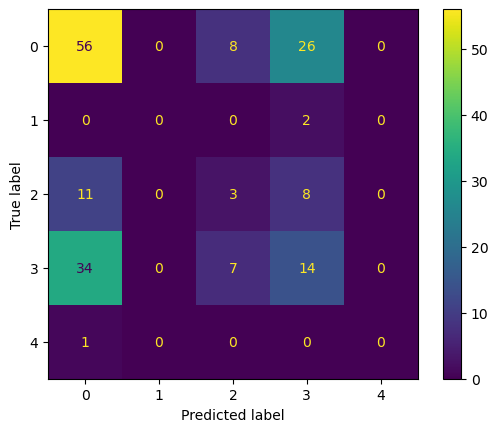

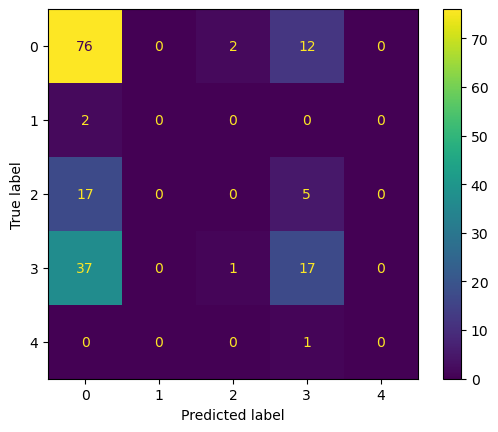

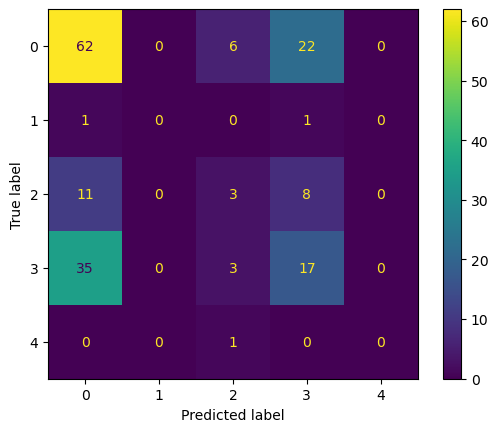

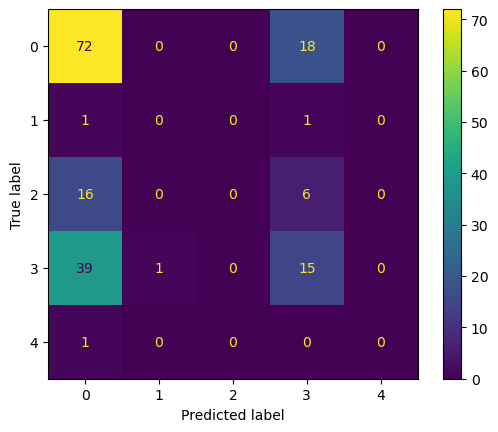

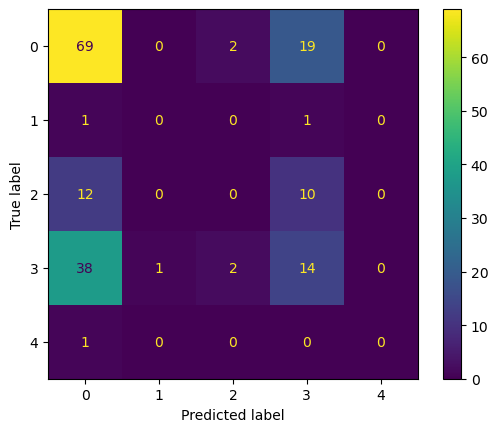

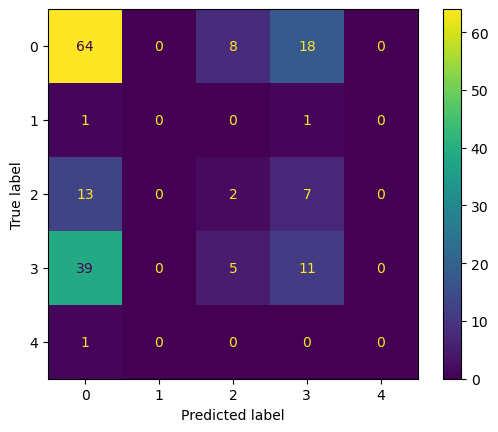

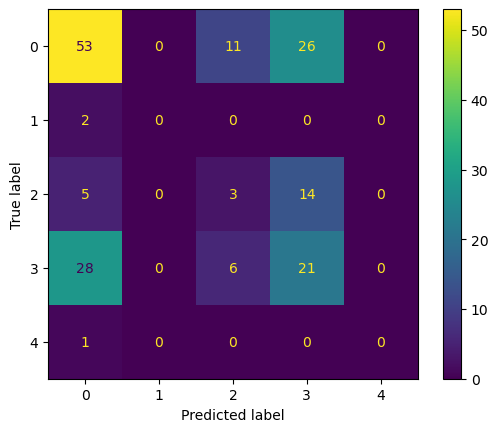

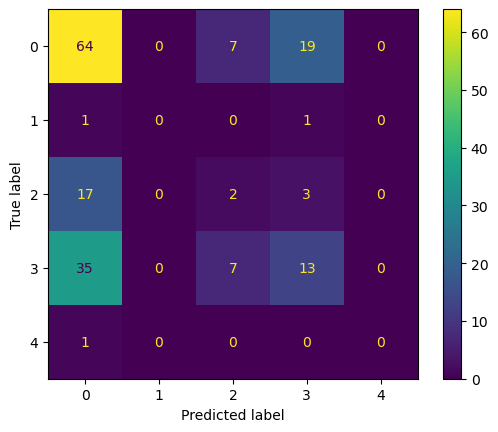

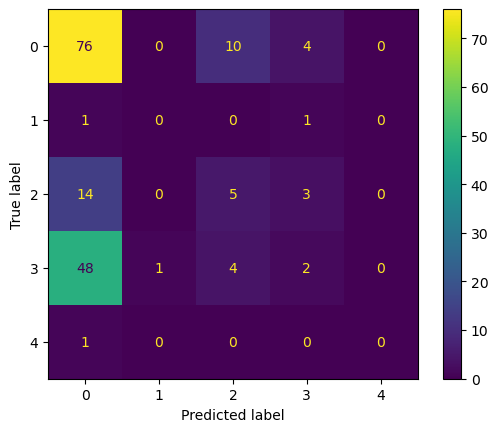

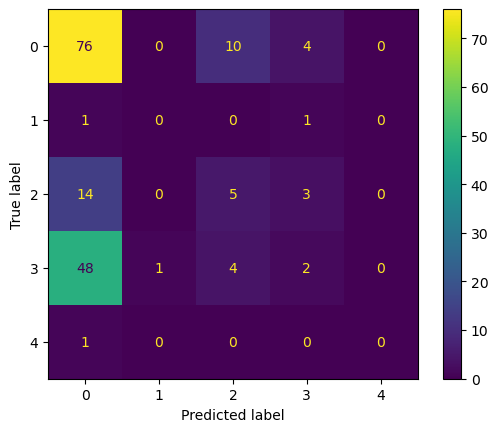

In [57]:
num_mfccs = [12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
ada_accuracy = []
train_time_ada = []
test_time_ada = []
for num_mfcc in num_mfccs:
    accuracy, train_time, test_time = eval_adaboost(num_mfcc)
    ada_accuracy.append(accuracy)
    train_time_ada.append(train_time)
    test_time_ada.append(test_time)